<a href="https://colab.research.google.com/github/thephoenix2048/Assignments/blob/main/MallCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd

#Load the dataset into a Pandas DataFrame

In [5]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.duplicated().value_counts()

False    200
dtype: int64

Observation:
1. No null values in dataset
2. No duplicated rows
3. Mean age of people visiting the mall is 38.8 and mean annual income is 60.5k

In [34]:
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='count'>

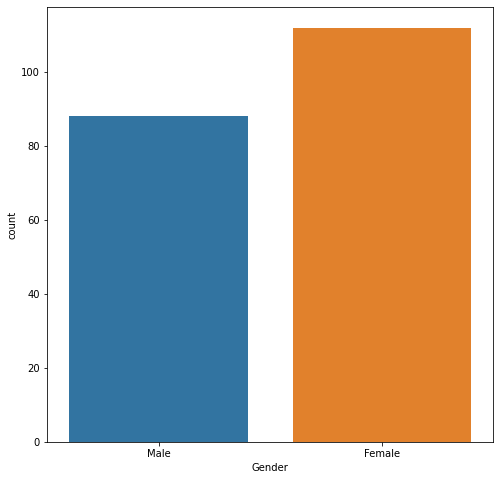

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(x='Gender', data=df)

Observation: More females visit the mall

In [12]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

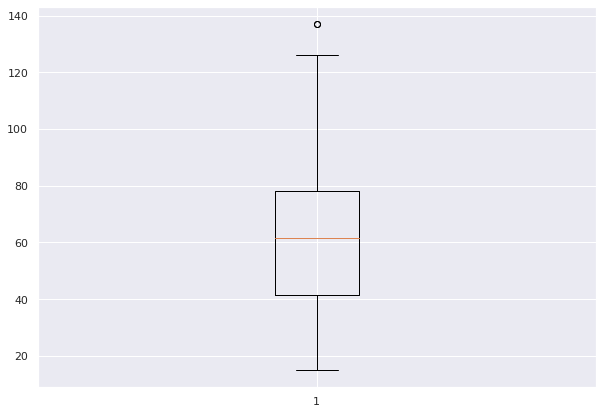

In [35]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Annual Income (k$)'])
plt.show()

Annual income of 140k is outlier

<Figure size 576x576 with 0 Axes>

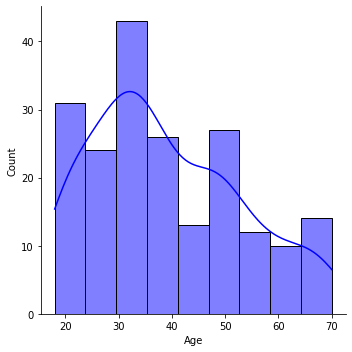

In [13]:
plt.figure(figsize=(8,8))
sns.displot(x=df['Age'], kde=True, color='blue')

Age group of 30-35 have the most visits to the mall followed by age group of 20-25.

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

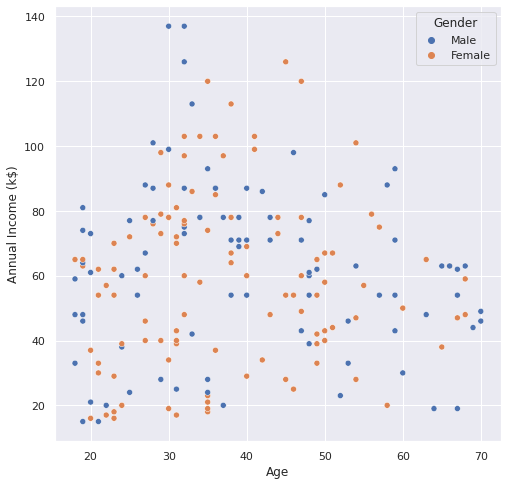

In [36]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='Age', y='Annual Income (k$)', hue='Gender')

It can be observed that males in the age group of 30-35 earn the most followed by some elder females.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

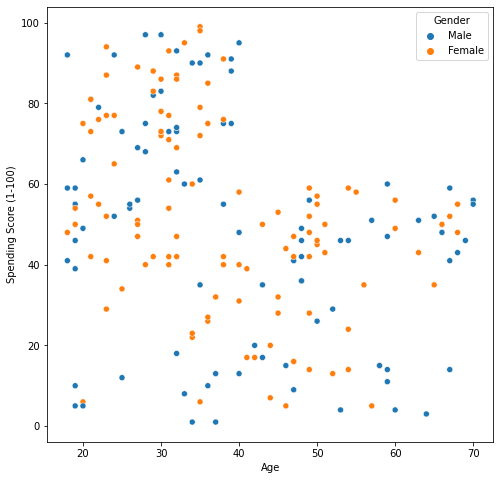

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='Age', y='Spending Score (1-100)', hue='Gender')

Observation: Males and Females spend the same amount irrespective of their incomes

In [16]:
subset = df.iloc[:,[3,4]].values

In [42]:
#Perform clustering analysis to segment customers into different groups based on their
#Annual Income and Spending Score. Use the elbow method to identify the optimal
#number of clusters

from sklearn import preprocessing
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
    kmeans.fit(subset)
    
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

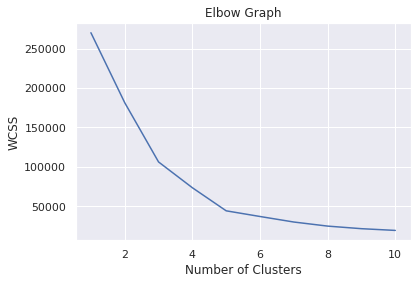

In [38]:
#Plotting elbow plot to check optimum number of clusters
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Observation: Optimum number of clusters = 5

In [39]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=100)
Y= kmeans.fit_predict(subset)
print(Y)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Visualizing the clusters

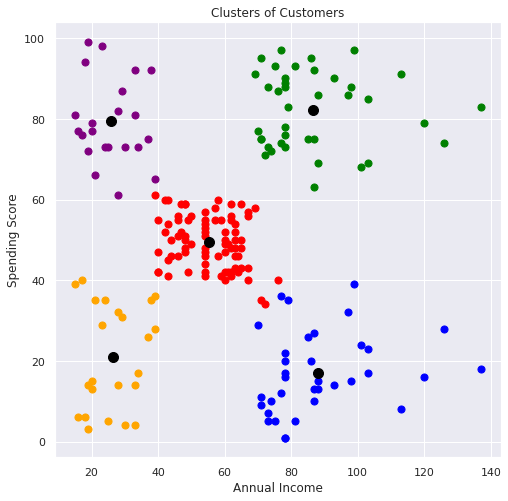

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(subset[Y==0,0], subset[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(subset[Y==1,0], subset[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(subset[Y==2,0], subset[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(subset[Y==3,0], subset[Y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(subset[Y==4,0], subset[Y==4,1], s=50, c='purple', label='Cluster 5')

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Insights:

1. Purple colored cluster is people with less than average annual income and high spending scores (tends to spend more)
2. Yellow colored cluster is people with less than average annual income as well as less spening score.
3. Red colored cluster is people with average annual income and average spends in the mall.
4. Blue colored cluster is people with more than average annual income and tend to spend less in the mall (more savings oriented).
5. Green colored cluster is people who earn more than average and also spend more (most effective targets for supposed ad campaigns). 